<a href="https://colab.research.google.com/github/AnuttharadeSilva/AnuttharadeSilva.github.io/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from string import punctuation 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.externals import joblib
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
df = pd.read_csv('./drive/My Drive/tweet/tweets.csv', delimiter = ',',encoding='ISO-8859-1')
#df = pd.read_csv('./drive/My Drive/tweet/reviews.csv', delimiter = ',',encoding='ISO-8859-1')
#frames = [df1,df2]
#df = pd.concat(frames)
#df = pd.DataFrame(df.values, columns = ['Sentiment','SentimentText'])
df = df.dropna()
df = df.reset_index(drop=True)
df_length =len(df)
df.shape

(20732, 2)

In [ ]:
df.head(10)

,Sentiment,SentimentText
0,0,I didn't realize it was THAT deep. Geez giv...
1,0,I hate it when any athlete appears to tear ...
2,0,i miss you guys too i think i'm wearing...
3,0,-- Meet your Meat http://bit.ly/15SSCI
4,0,My horsie is moving on Saturday morning.
5,0,No Sat off...Need to work 6 days a week
6,0,Really Dont Like Doing my Room Its So Borin...
7,0,"SOX! Floyd was great, but relievers nee..."
8,0,times by like a million
9,1,uploading pictures on friendster


In [ ]:
corpus = []
stopwords = set(stopwords.words('english')+list(punctuation)+['AT_USER','URL'])
for i in range(0, df_length):    
    tweet = re.sub('[^a-zA-Z]', ' ', df['SentimentText'][i])
    tweet = tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet)
    #tweet = tweet.split()
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tweet = tokenizer.tokenize(tweet)
    #ps = PorterStemmer()
    lmz = nltk.stem.WordNetLemmatizer()
    tweet = [lmz.lemmatize(word) for word in tweet if not word in stopwords ]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [ ]:
corpus[0:10]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cv = CountVectorizer()
td = TfidfTransformer(use_idf=True, norm='l2',smooth_idf=True)
docs = cv.fit_transform(corpus).toarray()
X = td.fit_transform(docs).toarray()
y = df.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# log_model = LogisticRegression()

In [ ]:
# param_grid = [    
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [100, 1000,2500, 5000]
#     }
# ]

In [ ]:
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(log_model, param_grid = param_grid, cv = 3, verbose=True)

In [ ]:
# best_clf = clf.fit(X_train,y_train)

In [ ]:
# best_clf.best_estimator_
# print (f'Accuracy - : {best_clf.score(X,y):.3f}')

In [ ]:
# #Predicting the Test set results
# y_pred1 = classifier1.predict(X_test)
# y_pred2 = classifier2.predict(X_test)
# y_pred3 = classifier3.predict(X_test)

# y_pred =[]
# for k in range(0,len(y_pred1)):
#   a=[y_pred1[k],y_pred2[k],y_pred3[k],y_pred1[k],y_pred1[k]]

#   if a.count(0)> a.count(1):
#     y_pred.append(0)
#   else:
#     y_pred.append(1)

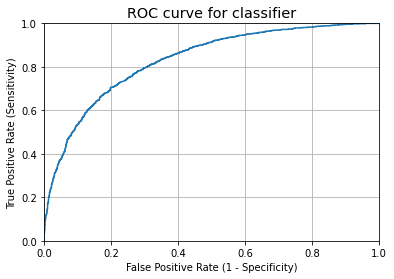

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#accuracy score
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

#confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Error: ',classification_error)

#recall/sensitivity
print('Sensitivity: ',metrics.recall_score(y_test, y_pred))

#specificity
specificity = TN / (TN + FP)
print('Specificity: ',specificity)

#false positive rate
print('false positive rate: ',1 - specificity)

#precision
print('precision: ',metrics.precision_score(y_test, y_pred))

#f1 score
from sklearn.metrics import f1_score
print('f1 score: ',f1_score(y_test, y_pred))

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(classifier, 'lr_new.pkl')
# #joblib.dump(cv, 'cv_new.pkl')
# #joblib.dump(td, 'td_new.pkl')